In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
from glob import glob


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
image = image.load_img('C:/Users/farza/OneDrive/Documents/Deep learning/Datasets/Covid19-dataset/train/Covid/01.JPEG')

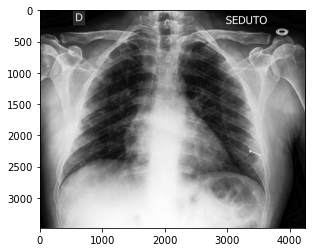

In [3]:
plt.imshow(image)

In [4]:
main_dir = 'C:/Users/farza/OneDrive/Documents/Deep learning/Datasets/Covid19-dataset'
train_set = f'{main_dir}/train'
test_set = f'{main_dir}/test'

In [5]:
optimal_img = [224,224]

In [6]:
vgg = VGG16(
    input_shape = optimal_img + [3],
    weights = 'imagenet',
    include_top = False
)

In [7]:
for layers in vgg.layers:
    layers.trainable = False

In [8]:
folder = glob('C:/Users/farza/OneDrive/Documents/Deep learning/Datasets/Covid19-dataset/train/*')

In [9]:
x = tf.keras.layers.Flatten()(vgg.output)

In [10]:
pred = tf.keras.layers.Dense(len(folder), activation = 'softmax')(x)
model = Model(inputs = vgg.inputs, outputs = pred)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
trdata = ImageDataGenerator(rescale = 1./255, horizontal_flip = True,)
traindata = trdata.flow_from_directory(directory="C:/Users/farza/OneDrive/Documents/Deep learning/Datasets/Covid19-dataset/train/",target_size=(224,224))
tsdata = ImageDataGenerator(rescale = 1./255)
testdata = tsdata.flow_from_directory(directory="C:/Users/farza/OneDrive/Documents/Deep learning/Datasets/Covid19-dataset/test/", target_size=(224,224))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [14]:
trfit = model.fit_generator(traindata, validation_data = testdata,epochs = 10, steps_per_epoch=len(traindata), validation_steps=len(testdata))

C:\Users\farza\AppData\Local\Temp/ipykernel_12056/3036825859.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trfit = model.fit_generator(traindata, validation_data = testdata,epochs = 10, steps_per_epoch=len(traindata), validation_steps=len(testdata))


Epoch 1/10
8/8 [==============================] - 39s 5s/step - loss: 151.0186 - accuracy: 0.4821 - val_loss: 198.4823 - val_accuracy: 0.5303
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 90.4769 - accuracy: 0.7251 - val_loss: 111.0796 - val_accuracy: 0.6970
Epoch 3/10
8/8 [==============================] - 37s 5s/step - loss: 35.2742 - accuracy: 0.8008 - val_loss: 16.2662 - val_accuracy: 0.8485
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 20.2459 - accuracy: 0.8805 - val_loss: 29.9422 - val_accuracy: 0.7273
Epoch 5/10
8/8 [==============================] - 36s 5s/step - loss: 7.1343 - accuracy: 0.9283 - val_loss: 31.7636 - val_accuracy: 0.8030
Epoch 6/10
8/8 [==============================] - 36s 5s/step - loss: 5.9456 - accuracy: 0.9402 - val_loss: 18.6954 - val_accuracy: 0.8182
Epoch 7/10
8/8 [==============================] - 37s 5s/step - loss: 1.3054 - accuracy: 0.9801 - val_loss: 4.1685 - val_accuracy: 0.9091
Epoch 8/10
8/8 [=====